# Tools for working with Arcadia's plotting styles

Arcadia has a set of visual communication standards for figures. `arcadia-pycolor` provides utilities for automatically styling figures in Python with these standards.

## Example without `arcadia-pycolor`
Using plotting tools like `seaborn`, you can create plots with their default styles. These styles don't conform to Arcadia's style standards.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import seaborn as sns
from sklearn import datasets

import arcadia_pycolor as apc

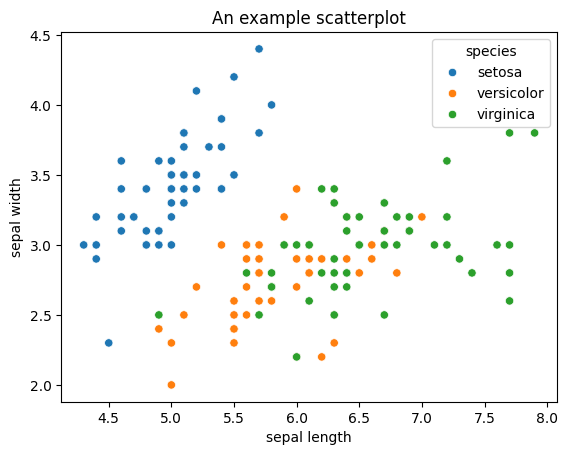

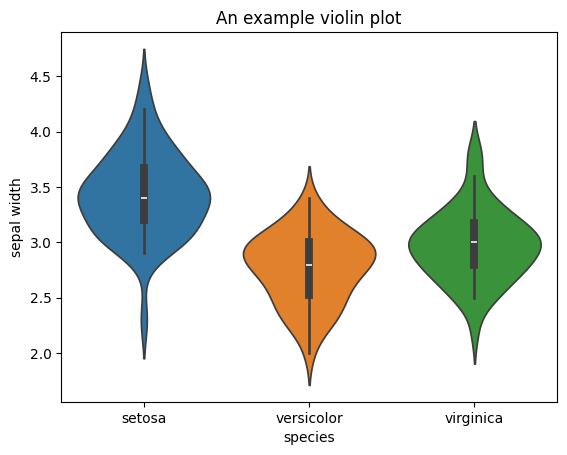

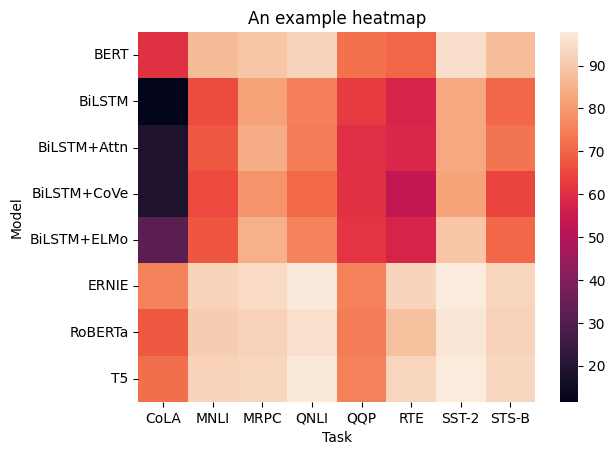

In [2]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = [i.replace(" (cm)", "") for i in iris.feature_names]
iris_data["species"] = iris.target_names[iris.target]
iris_data.head(5)

x_data = "sepal length"
y_data = "sepal width"
c_data = "species"

sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data)
plt.title("An example scatterplot")
plt.show()

sns.violinplot(x=c_data, y=y_data, data=iris_data, hue=c_data)
plt.title("An example violin plot")
plt.show()

glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
sns.heatmap(glue)
plt.title("An example heatmap")
plt.show()

## Using `apc.mpl.setup()` to apply Arcadia's styles
Using `arcadia_pycolor`'s `apc.mpl.setup()` function, you can update `matplotlib`'s default style settings to conform to Arcadia's standards. 

For example, the above plots don't use the Suisse family of fonts, which are the official fonts specified by Arcadia's style guide.

If you have Suisse family fonts installed, `apc.mpl.setup()` will use them. If you don't have them installed, `apc.mpl.setup()` will still work for other style settings, but the fonts will be the default ones.

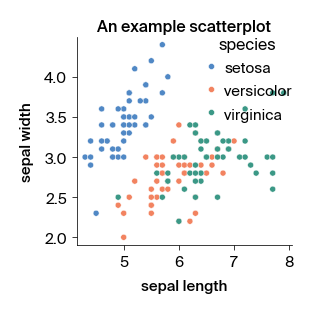

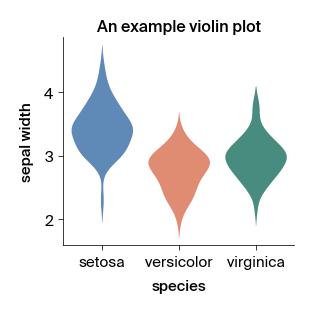

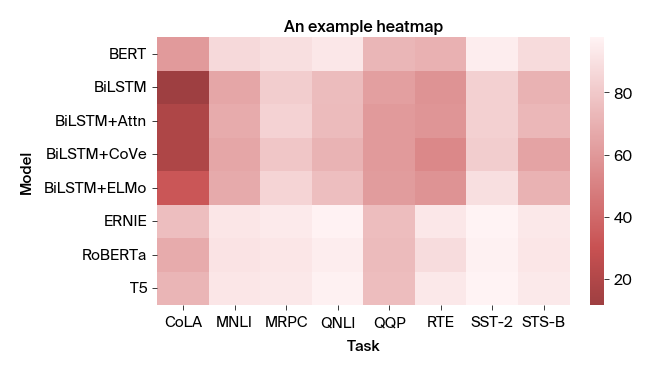

In [3]:
apc.mpl.setup()

colors = {
    "setosa": apc.aegean,
    "versicolor": apc.amber,
    "virginica": apc.seaweed,
}

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_square"), layout="constrained")
sns.scatterplot(
    x=x_data,
    y=y_data,
    hue=c_data,
    data=iris_data,
    palette=colors,
    ax=ax,
)
plt.title("An example scatterplot")
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_square"), layout="constrained")
sns.violinplot(
    x=c_data,
    y=y_data,
    data=iris_data,
    hue=c_data,
    palette=colors,
    ax=ax,
)
plt.title("An example violin plot")
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_wide"), layout="constrained")
sns.heatmap(glue, ax=ax, cmap=apc.gradients.reds.to_mpl_cmap())
plt.title("An example heatmap")
plt.show()

## Automatic registration of Arcadia's colors and gradients in `matplotlib`

When using `apc.mpl.setup()`, Arcadia's named colors and colormaps are automatically registered in `matplotlib`. This allows you to use them in your plots without having to directly pass the colors or gradients.

These registered colors and colormaps are prefixed with `apc:`. For example, `apc:sky` is a registered color, and `apc:blues` is a registered colormap. You can reverse gradients by appending `_r` to the colormap name, e.g. `apc:blues_r`.

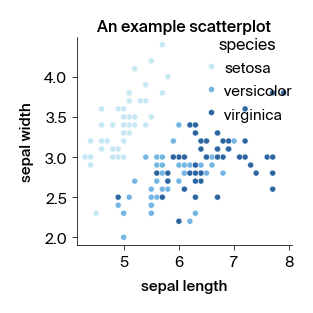

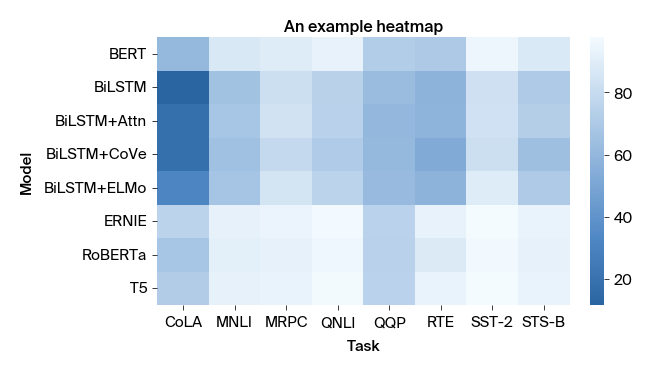

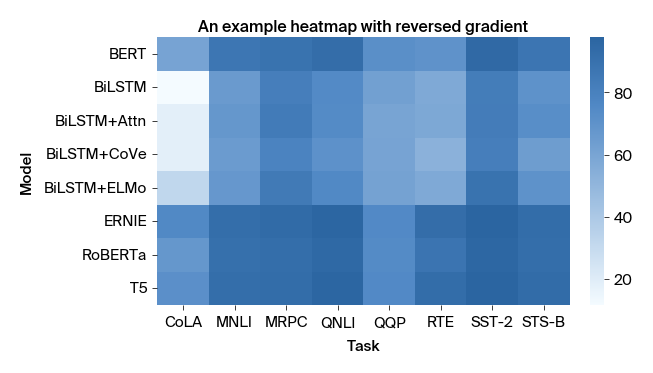

In [4]:
registered_colors = {
    "setosa": "apc:sky",
    "versicolor": "apc:vital",
    "virginica": "apc:lapis",
}

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_square"), layout="constrained")
sns.scatterplot(
    x=x_data,
    y=y_data,
    hue=c_data,
    data=iris_data,
    palette=registered_colors,
    ax=ax,
)
plt.title("An example scatterplot")
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_wide"), layout="constrained")
sns.heatmap(glue, ax=ax, cmap="apc:blues")
plt.title("An example heatmap")
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_wide"), layout="constrained")
sns.heatmap(glue, ax=ax, cmap="apc:blues_r")
plt.title("An example heatmap with reversed gradient")
plt.show()

## Generating publication-ready plots with `apc.mpl.style_axis()`

`apc.mpl.style_axis()` can be used to further style plots conform to Arcadia's standards. You can call this function after creating a plot to apply the following changes:
- Automatically capitalize legend and axis titles.
- Add a horizontal line between legend title and entries.
- When using the `monospaced_axes` argument; converts axis labels to monospaced font.
- When using the `categorical_axes` argument; capitalizes text, removes tickmarks, and adjusts padding.
- When using the `colorbar_exists` argument; converts axis labels to monospaced font.

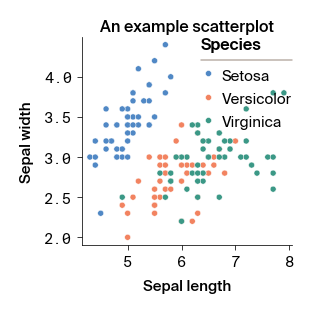

/Users/keith/projects/arcadia-pycolor/arcadia_pycolor/mpl.py:135: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)  # type: ignore


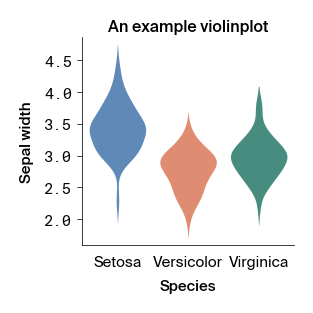

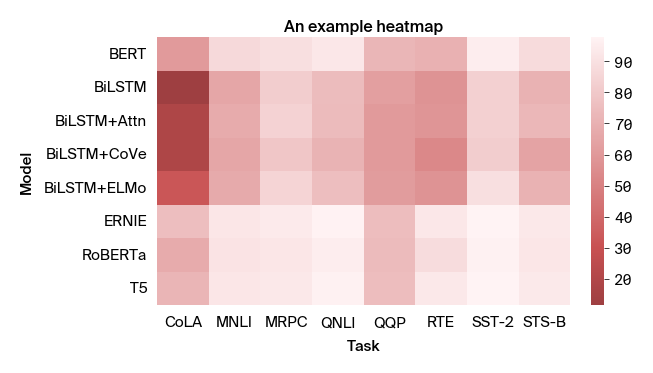

In [5]:
fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_square"), layout="constrained")
sns.scatterplot(
    x=x_data,
    y=y_data,
    hue="species",
    data=iris_data,
    palette=colors,
    ax=ax,
)
apc.mpl.style_axis(monospaced_axes="both")
plt.title("An example scatterplot")
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_square"), layout="constrained")
sns.violinplot(
    x=c_data,
    y=y_data,
    data=iris_data,
    hue=c_data,
    palette=colors,
    ax=ax,
)
apc.mpl.style_axis(categorical_axes="x", monospaced_axes="y")
plt.title("An example violinplot")
plt.show()

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("float_wide"), layout="constrained")
sns.heatmap(glue, ax=ax, cmap="apc:reds")
apc.mpl.style_axis(colorbar_exists=True)
apc.mpl.set_xaxis_categorical()
apc.mpl.set_yaxis_categorical()
plt.title("An example heatmap")
plt.show()

## Using default figure sizes

The `apc.mpl.get_figure_dimensions()` function allows you to choose from a fixed set of plot sizes. These are compatible with our Adobe Creative Cloud templates.

When generated with `layout="constrained"` and saved using `apc.mpl.save_figure()`, the resulting PDF images should drag and drop neatly into place with the Illustrator templates.

There are three size categories, based on the Creative Cloud templates:
- `"full"` (1000px wide)
- `"float"` (700px wide)
- `"half"` (500px wide)

Each size category has a few options for aspect ratio:
- `"wide"`: wider on the horizontal axis, for `"full"` and `"float"` sizes
- `"square"`: equal width and height, for all sizes

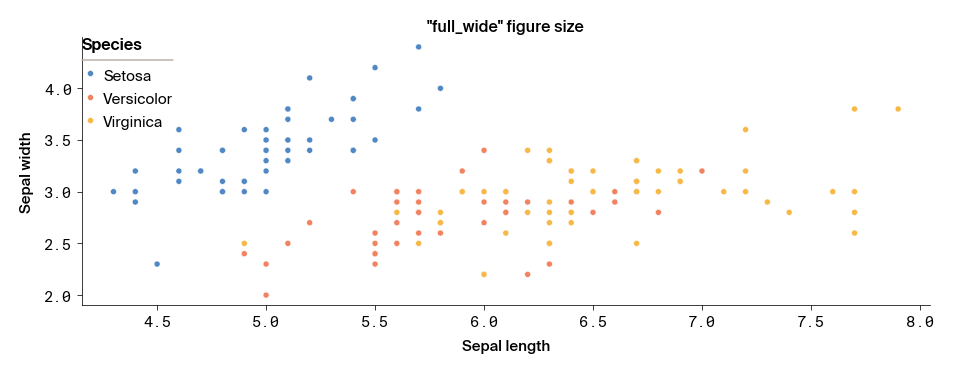

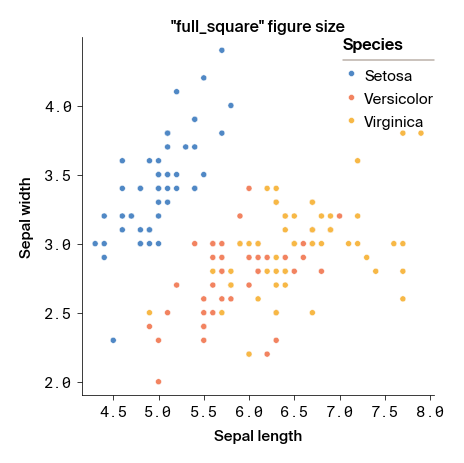

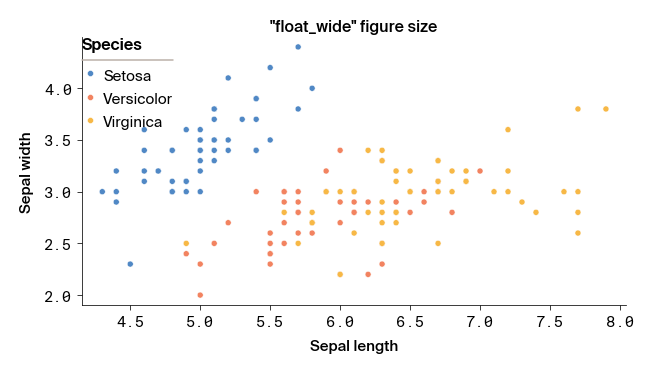

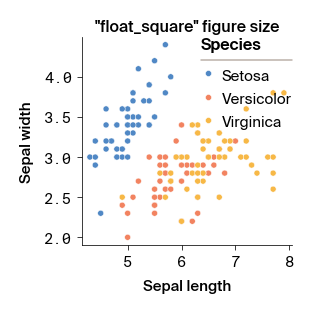

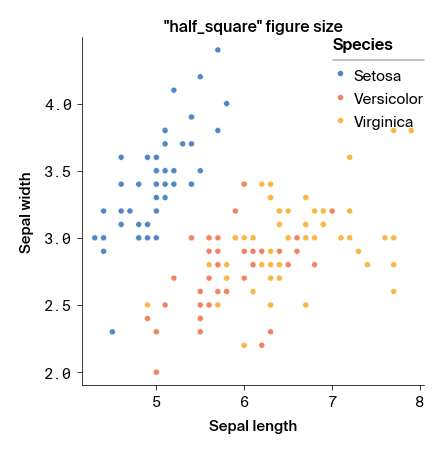

In [6]:
for plot_size in ("full_wide", "full_square", "float_wide", "float_square", "half_square"):
    fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions(plot_size), layout="constrained")
    sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data, ax=ax)
    apc.mpl.style_axis(monospaced_axes="both")
    plt.title(f'"{plot_size}" figure size')
    plt.show()

## Simulating colored backgrounds

The default Creative Cloud templates use an `apc.parchment` background color. You can simulate this background color in your plots by modifying `matplotlib`'s rcParams within a `with` statement. When saved using `apc.mpl.save_figure()`, PDF files default to using a transparent background.

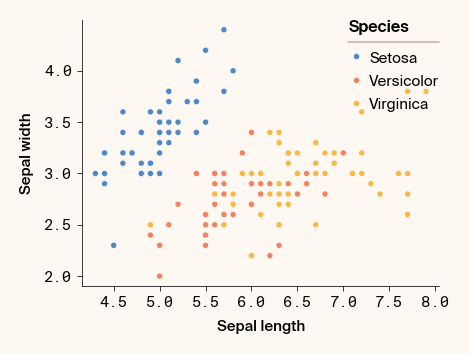

In [7]:
with mpl.rc_context({"figure.facecolor": apc.parchment}):
    sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data)
    apc.mpl.style_axis(monospaced_axes="both")
    plt.show()

## Saving figures

The `arcadia_pycolor` package provides a convenience function `apc.mpl.save_figure` to save figures with the correct resolutions (DPI) for web and print publication.

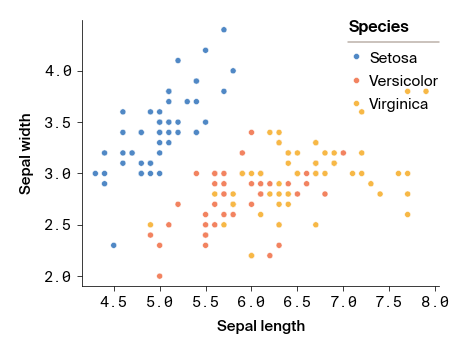

In [8]:
output_dirpath = pathlib.Path("output")
output_dirpath.mkdir(exist_ok=True)

sns.scatterplot(x=x_data, y=y_data, hue="species", data=iris_data)
apc.mpl.style_axis(monospaced_axes="both")

# Save a figure with the resolution for websites.
apc.mpl.save_figure(fname=str(output_dirpath / "example-figure-web.pdf"), context="web")

# Save a figure with the resolution for print.
apc.mpl.save_figure(fname=str(output_dirpath / "xample-figure-print.pdf"), context="print")